1. CAR PRICE PREDICTON PROJECT
2. NAME - YASH

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Car Price prediction/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Preprocessing of Data

In [ ]:
#Checking null values in the data.
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Exploratory Data Analysis

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Fuel_Type', ylabel='count'>

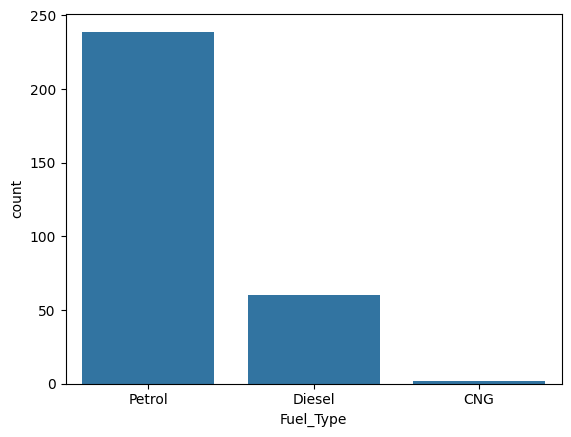

In [ ]:
sns.countplot(x=df['Fuel_Type'])

From the above plot we can see that more than 200 cars are of petrol type.

In [ ]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

<Axes: ylabel='count'>

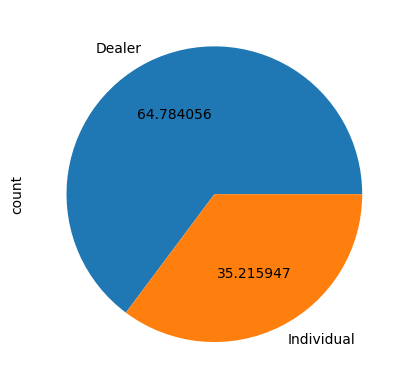

In [ ]:
df['Selling_type'].value_counts().plot(kind='pie',autopct='%2f')

We can see from the above pie chart that more than 64 percent cars are selling by the dealers as compared to individuals.

In [ ]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

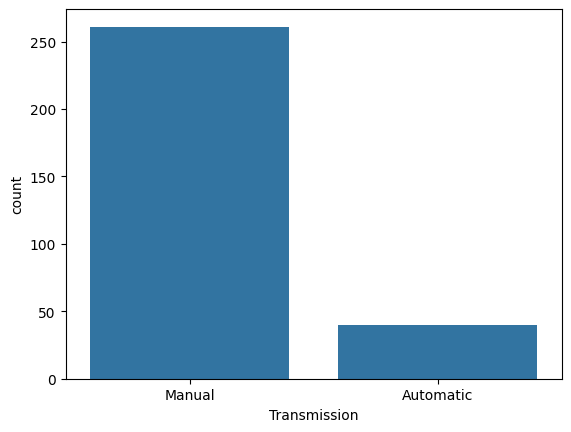

In [ ]:
sns.countplot(x=df['Transmission'])

From the above graph we can see that the manual transmission is in more than 250 cars as compared to Automatic.

<Axes: ylabel='Selling_Price'>

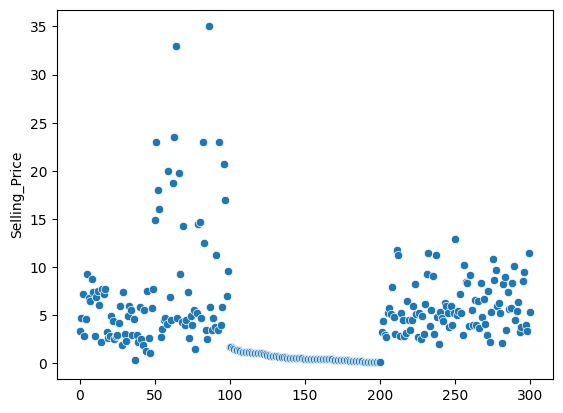

In [ ]:
sns.scatterplot(df['Selling_Price'])

Outliers can be detected and we can see that how the selling price varies with the driven kms.

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

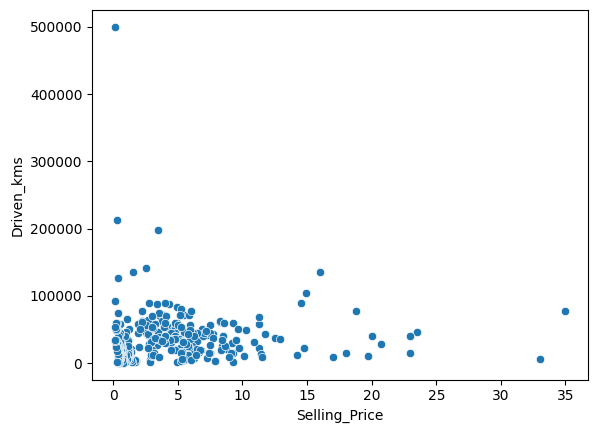

In [ ]:
sns.scatterplot(x=df['Selling_Price'],y=df['Driven_kms'])


<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

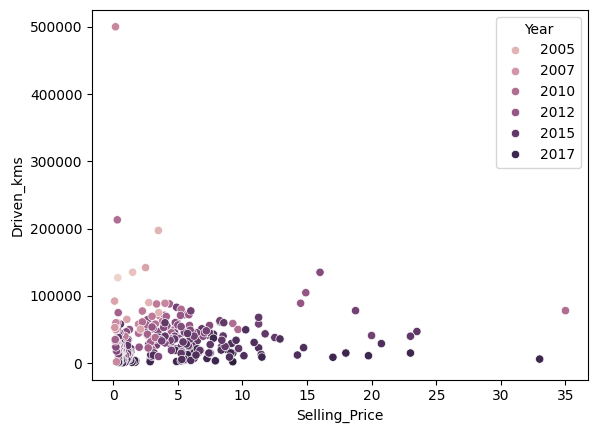

In [ ]:
sns.scatterplot(x=df['Selling_Price'],y=df['Driven_kms'],hue=df['Year'])

(array([  3.,   4.,   6.,   7.,  21.,  19.,  56.,  38., 111.,  36.]),
 array([2003. , 2004.5, 2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5,
        2015. , 2016.5, 2018. ]),
 <BarContainer object of 10 artists>)

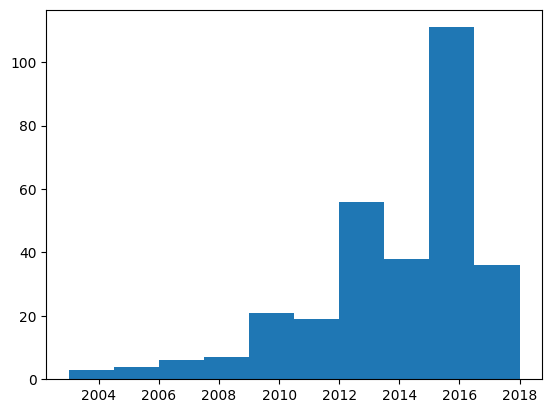

In [ ]:
plt.hist(df['Year'])

Most of the cars belong to the year 2016.

In [ ]:
#encoding the "Transmission" column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Now splitting the data into test and train data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
71,2011,12.48,45000,1,0,0,0
37,2003,2.28,127000,0,1,0,0
142,2015,0.84,29000,0,1,0,0
272,2015,10.00,27600,0,0,0,0
186,2010,0.52,22000,0,1,1,0
...,...,...,...,...,...,...,...
262,2015,5.80,40023,0,0,0,0
69,2016,20.91,12000,0,0,0,0
103,2017,1.60,1200,0,1,0,0
117,2015,1.90,14000,0,1,0,0


In [ ]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
284,2013,5.90,9800,0,0,0,0
9,2015,8.92,42367,1,0,0,0
44,2012,2.69,50000,0,0,0,0
60,2013,18.61,40001,0,0,0,0
108,2016,1.50,18000,0,1,0,0
98,2013,18.61,45000,0,0,0,0
219,2012,9.40,36000,0,0,0,0
28,2010,3.95,44542,0,0,0,0
74,2014,8.93,83000,1,0,0,0
54,2005,10.21,90000,0,1,0,0


In [ ]:
Y_train

71      4.50
37      0.35
142     0.60
272     7.50
186     0.25
       ...  
262     4.00
69     14.25
103     1.45
117     1.10
77      1.50
Name: Selling_Price, Length: 270, dtype: float64

In [ ]:
Y_test

284     3.50
9       7.45
44      1.25
60      6.95
108     1.20
98      7.05
219     4.50
28      1.95
74      4.90
54      2.75
226     5.25
168     0.42
176     0.35
204     2.75
79     14.50
227     2.55
247     5.95
241     4.75
68      4.35
256    10.25
224     5.11
136     0.65
122     1.05
261     5.50
283     8.99
18      3.25
277     9.70
229     3.10
40      5.85
174     0.38
130     0.75
Name: Selling_Price, dtype: float64

MODEL TRAINING

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
clf=LinearRegression()

In [ ]:
clf.fit(X_train,Y_train)

LinearRegression()

Now we are Evaluating the model by predicting the values after the training of the model

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
284,2013,5.90,9800,0,0,0,0
9,2015,8.92,42367,1,0,0,0
44,2012,2.69,50000,0,0,0,0
60,2013,18.61,40001,0,0,0,0
108,2016,1.50,18000,0,1,0,0
98,2013,18.61,45000,0,0,0,0
219,2012,9.40,36000,0,0,0,0
28,2010,3.95,44542,0,0,0,0
74,2014,8.93,83000,1,0,0,0
54,2005,10.21,90000,0,1,0,0


In [ ]:
y_pred

array([ 3.70687117,  7.38798946,  1.63510473,  9.11690695,  1.80660506,
        9.08554171,  4.67910698,  1.41377675,  6.73211157,  0.73340112,
        4.33608952,  0.28899984, -0.49363774,  3.75396489, 16.99440536,
        1.95242038,  5.89512631,  4.17862201,  5.85953675,  8.06572876,
        6.64246851,  0.82924865,  1.73651167,  4.98008181,  7.52715508,
        7.48800852,  7.83470165,  5.17230737,  7.25767623,  0.92837734,
        1.97831174])

In [ ]:
Y_test

284     3.50
9       7.45
44      1.25
60      6.95
108     1.20
98      7.05
219     4.50
28      1.95
74      4.90
54      2.75
226     5.25
168     0.42
176     0.35
204     2.75
79     14.50
227     2.55
247     5.95
241     4.75
68      4.35
256    10.25
224     5.11
136     0.65
122     1.05
261     5.50
283     8.99
18      3.25
277     9.70
229     3.10
40      5.85
174     0.38
130     0.75
Name: Selling_Price, dtype: float64

In [ ]:
#R squared Error
error_score=metrics.r2_score(Y_test,y_pred)
print("R squared Error:",error_score)

R squared Error: 0.7994648479631442


Visualization of the Actual values vs Predicted values.

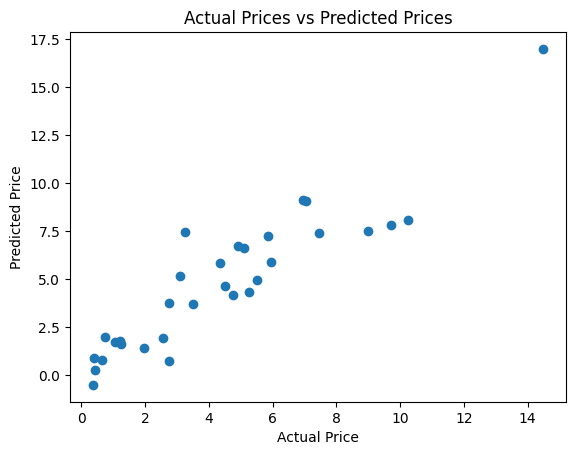

In [ ]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('Carmodel.pkl','wb'))